In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-prediction/master_dataset.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("/kaggle/input/covid-19-prediction/master_dataset.csv",low_memory=False)

In [4]:
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,...,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality
2020-03-26,NaN,CA,43.7080,-79.3073,100.0,male,20_30,178,88,27.7,...,0,0,0,0,NaN,NaN,NaN,5.0,0.050,NaN
2020-03-25,NaN,CA,51.0538,-114.1149,5.0,female,30_40,158,54,21.6,...,0,0,0,0,NaN,NaN,NaN,5.0,0.050,NaN
2020-03-24,NaN,CA,43.2070,-79.8809,100.0,male,90_100,184,94,27.7,...,1,0,0,0,NaN,NaN,NaN,12.0,14.701,NaN
2020-03-25,NaN,CA,45.6700,-73.6723,5.0,male,60_70,172,96,32.4,...,1,0,0,0,NaN,NaN,NaN,6.0,2.250,NaN
2020-03-24,NaN,CA,49.3233,-123.0751,1.0,male,30_40,166,70,25.4,...,0,0,0,0,NaN,NaN,NaN,5.0,0.050,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-22,NaN,US,36.7915,-108.2421,5.0,male,60_70,180,90,27.7,...,0,0,0,0,NaN,5.0,5.0,5.0,1.081,NaN
2021-02-24,NaN,MX,19.1646,-99.1587,5.0,male,10_20,184,122,36.0,...,0,0,0,0,NaN,15.0,35.0,5.0,0.121,NaN
2021-02-23,EU,RO,44.5072,26.2387,10.0,male,30_40,184,96,28.3,...,0,0,0,0,NaN,5.0,5.0,5.0,0.050,NaN
2021-02-23,EU,DE,48.2462,11.4865,1.0,male,40_50,182,110,33.2,...,1,0,0,0,NaN,5.0,5.0,5.0,0.229,NaN


In [5]:
current_columns = df.columns.tolist()
new_columns = current_columns[1:] + ['empty_column']
df_fixed = df.copy()
df_fixed.columns = new_columns
df = df_fixed.drop('empty_column', axis=1)

In [6]:
df = df[['sex', 'age', 'bmi','smoking','alcohol','cannabis','amphetamines','cocaine','contacts_count','working','rate_reducing_risk_single','rate_reducing_mask','covid19_symptoms','covid19_contact','asthma','kidney_disease','liver_disease','compromised_immune','heart_disease','lung_disease','diabetes','hiv_positive','hypertension','other_chronic','nursing_home','health_worker','covid19_positive']]

In [7]:
def process_age_column(df, age_column='age'):
    """
    Process age column containing string ranges like '20_30' to their average values
    and handle null values by replacing them with mean.
    
    Parameters:
    df: pandas DataFrame
    age_column: str, name of the age column (default='age')
    
    Returns:
    pandas Series with processed age values
    """
    def extract_average(age_str):
        if pd.isna(age_str):
            return np.nan
        try:
            # Split the string on '_' and convert to integers
            start, end = map(int, str(age_str).split('_'))
            return (start + end) / 2
        except:
            return np.nan
    
    # Convert string ranges to averages
    processed_ages = df[age_column].apply(extract_average)
    
    # Replace null values with mean
    mean_age = processed_ages.mean()
    processed_ages = processed_ages.fillna(mean_age)
    
    return processed_ages

df['age'] = process_age_column(df, age_column='age')

In [8]:
categorical_cols = ['sex', 'age', 'smoking', 'alcohol', 'working', 'cannabis', 
                       'amphetamines', 'cocaine']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

In [9]:
numerical_cols = ['bmi', 'contacts_count', 'rate_reducing_mask']
for col in numerical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())

In [10]:
nominal_cols = ['sex', 'smoking', 'working']
df_encoded = pd.get_dummies(df, columns=nominal_cols)
drug_cols = ['cannabis', 'amphetamines', 'cocaine']
for col in drug_cols:
    if col in df_encoded.columns:
        df_encoded[col] = pd.to_numeric(df_encoded[col], errors='coerce')
df=df_encoded

In [11]:
df

,age,bmi,alcohol,cannabis,amphetamines,cocaine,contacts_count,rate_reducing_risk_single,rate_reducing_mask,covid19_symptoms,...,smoking_quit5,smoking_vape,smoking_yesheavy,smoking_yeslight,smoking_yesmedium,working_home,working_never,working_stopped,working_travel critical,working_travel non critical
2020-03-26,25.0,27.7,0.0,-1.0,-1.0,-1.0,7.50856,0,2.817407,0,...,False,False,False,False,False,False,False,True,False,False
2020-03-25,35.0,21.6,0.0,-1.0,-1.0,-1.0,7.50856,0,2.817407,0,...,False,False,False,False,False,False,False,True,False,False
2020-03-24,95.0,27.7,0.0,-1.0,-1.0,-1.0,7.50856,0,2.817407,0,...,False,False,False,False,False,False,False,True,False,False
2020-03-25,65.0,32.4,0.0,-1.0,-1.0,-1.0,7.50856,0,2.817407,0,...,False,False,False,False,False,False,False,True,False,False
2020-03-24,35.0,25.4,0.0,-1.0,-1.0,-1.0,7.50856,0,2.817407,0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-22,65.0,27.7,3.0,-1.0,-1.0,-1.0,6.00000,0,4.000000,0,...,False,False,False,False,False,True,False,False,False,False
2021-02-24,15.0,36.0,-1.0,-1.0,-1.0,-1.0,4.00000,0,5.000000,0,...,False,False,False,False,False,False,True,False,False,False
2021-02-23,35.0,28.3,2.0,-1.0,-1.0,-1.0,5.00000,0,4.000000,0,...,False,False,False,True,False,True,False,False,False,False
2021-02-23,45.0,33.2,3.0,-1.0,-1.0,-1.0,5.00000,0,1.000000,0,...,False,True,False,False,False,False,False,True,False,False


In [12]:
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

In [13]:
df.columns

Index(['age', 'bmi', 'alcohol', 'cannabis', 'amphetamines', 'cocaine',
       'contacts_count', 'rate_reducing_risk_single', 'rate_reducing_mask',
       'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease',
       'liver_disease', 'compromised_immune', 'heart_disease', 'lung_disease',
       'diabetes', 'hiv_positive', 'hypertension', 'other_chronic',
       'nursing_home', 'health_worker', 'covid19_positive', 'sex_female',
       'sex_male', 'sex_other', 'sex_undefined', 'smoking_never',
       'smoking_quit0', 'smoking_quit10', 'smoking_quit5', 'smoking_vape',
       'smoking_yesheavy', 'smoking_yeslight', 'smoking_yesmedium',
       'working_home', 'working_never', 'working_stopped',
       'working_travel critical', 'working_travel non critical'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


=== One-Class KMeans ===
              precision    recall  f1-score   support

           0     0.9909    0.9526    0.9714    202252
           1     0.0643    0.2703    0.1039      2434

    accuracy                         0.9445    204686
   macro avg     0.5276    0.6115    0.5376    204686
weighted avg     0.9798    0.9445    0.9611    204686



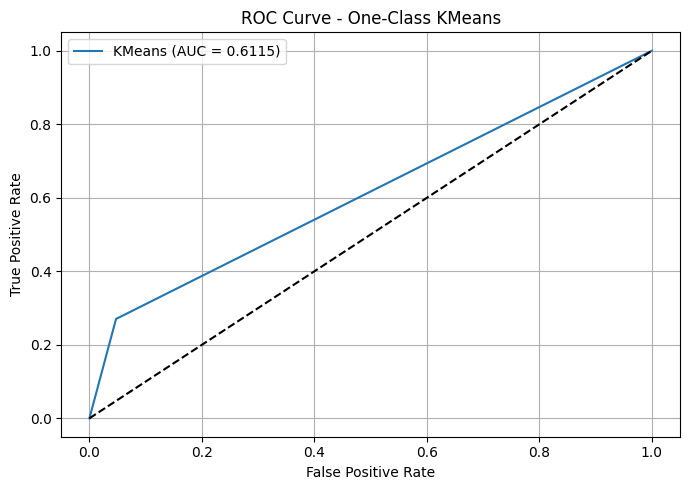

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Separate features and target
X = df.drop("covid19_positive", axis=1)
y = df["covid19_positive"]

# Step 2: Stratified Split
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 3: Keep only class 0 for training
X_train = X_train_full[y_train_full == 0]

# Step 4: Train KMeans on class 0 data
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train)

# Compute distances from each test point to its nearest cluster center
# X_test.values[:, None] creates a new axis so we can compute distances to all centers
distances = np.min(np.linalg.norm(X_test.values[:, None] - kmeans.cluster_centers_, axis=2), axis=1)

# Step 5: Set threshold for anomaly (top 5% furthest points are considered anomalies)
threshold = np.percentile(distances, 95)
y_pred_binary = (distances > threshold).astype(int)

# Evaluate
fpr, tpr, _ = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

print("=== One-Class KMeans ===")
print(classification_report(y_test, y_pred_binary, digits=4))

# Plot ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'KMeans (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - One-Class KMeans")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
